## Exercise 2

In the `FiniteDifferences` notebook we considered the differential equation controlling heat flow which relates the rate of change in $T$, the temperature, to spatial gradients in the same quantity. 

$$
\frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial x^2} + H
$$
       
       
We ignored $H$ and solved a number of examples. 

At the end of the notebook we looked at the time-varying solution of the heat equation using an explicit finite difference approximation. Given all the trouble we went to setting this up, don't you think it would be a good idea to see if we can iterate until we reach the steady-state solution?

This is not very complicated to do so I would like you to try it __for the case where $\kappa$ is constant__.

You can copy and paste the cells from the `FiniteDifferences` here to get started.

## Hints

You have most of the code you need. The `np.gradient` function will still be useful ... in fact you really only have to put everything in a `for` loop and enforce the boundary conditions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ny = 30
nx = 30

dx = 1
dy = 1

T = np.zeros((ny,nx))
T[0,:] = 300
T[-1,:] = 800

k = 1.0
time = 0.0
nsim = 10000

for i in range(0,nsim):
        
    gradTx, gradTy = np.gradient(T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy

    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = (dx*dy)/k
    time += dt  

    T_new = T + dt*divT
    
    T2 = T.copy()
    
    T = T_new
    
    if np.all(np.abs(T2 - T) < 0.001):
        break

if i != nsim-1:
    print("The for loop converges at", i, "iteration")
else:
    print("The for loop does not successfully converge. Please try a larger number for nsim.")

The for loop converges at 3742 iteration


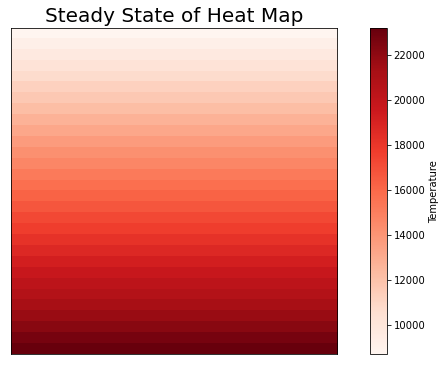

In [3]:
fig = plt.figure(1, figsize=(12,6))
ax = fig.add_subplot(111)
ax.set_title("Steady State of Heat Map", fontsize=20)

ax.set_xticks([])
ax.set_yticks([])

im = ax.imshow(T_new, cmap='Reds')
cbar = plt.colorbar(im)
cbar.set_label('Temperature', loc='center')

pass

Here we see code for creating a heat map with a grid of 30 by 30; an initial starting temperature of 300 for the top border and 800 for the bottom; and thermal conductivity of 1. To reach steady state, a for loop is created where for each iteration T_new replaces T so that T_new is recalculated with the updated heat map. An if statement is subsequently added to stop the for loop after reaching steady state. A second if statement is added to tell the user if nsim (number of maximum iterations) is too small and should be changed.

We know that there is an instability in the code which occurs if the timestep is too large. Currently the timestep size is related to the size of the mesh and the diffusivity:

$$
\Delta t = \frac{\Delta x \Delta y}{\kappa}
$$


What happens if you overwrite the timestep size, `dt`? What is the point where the solution begins to breakdown and you see wild oscillations? Is it pretty close to the above relation?

In [4]:
ny = 30
nx = 30

dx = 1
dy = 1

T = np.zeros((ny,nx))
T[0,:] = 300
T[-1,:] = 800

k = 1.0
time = 0.0
nsim = 10000

for i in range(0,nsim):
        
    gradTx, gradTy = np.gradient(T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy

    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = 2.0242
    time += dt  

    T_new = T + dt*divT
    
    T2 = T.copy()
    
    T = T_new
    
    if np.all(np.abs(T2 - T) < 0.001):
        break

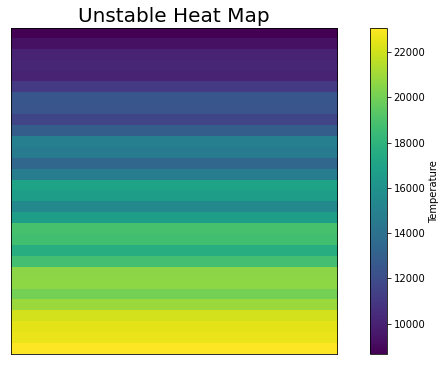

In [5]:
fig = plt.figure(1, figsize=(12,6))
ax = fig.add_subplot(111)
ax.set_title("Unstable Heat Map", fontsize=20)

ax.set_xticks([])
ax.set_yticks([])

im = ax.imshow(T_new, cmap='viridis')
cbar = plt.colorbar(im)
cbar.set_label('Temperature', loc='center')

pass

We can see here that by changing dt above a certain threshold (in this case 2.0242) the heat map begins to break down. Changing this value higher incrementally by 0.0001 results in further degradation. This is due to the exponential rise after constantly multiplying and adding T from the for loop (T_new = T + dt * divT and then replacing T with T_new). It simply cannot calculate such high numbers. 